## Install packages

In [ ]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu langchain-community

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 20.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.2/49.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install azure-ai-formrecognizer pandas langchain faiss-cpu

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 301.4/301.4 kB 5.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.3/194.3 kB 19.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.4/85.4 kB 7.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
import os
import getpass
import requests
from PIL import Image
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

from langchain_text_splitters import CharacterTextSplitter
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

from langchain_core.runnables import RunnableLambda, RunnablePassthrough

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [ ]:
from langchain_community.vectorstores import FAISS

## Set API Key

In [ ]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

## Custom Functions to load image

In [ ]:
def get_image(url, filename, extention):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extention}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extention}")
  image.show()
  return image

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

## Test LLM

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
result = llm.invoke("‡∏ó‡∏µ‡πà‡∏ó‡πà‡∏≠‡∏á‡πÄ‡∏ó‡∏µ‡πà‡∏¢‡∏ß‡πÉ‡∏ô‡∏•‡∏≥‡∏õ‡∏≤‡∏á")
print(result.content)

## ‡∏ó‡∏µ‡πà‡∏ó‡πà‡∏≠‡∏á‡πÄ‡∏ó‡∏µ‡πà‡∏¢‡∏ß‡πÉ‡∏ô‡∏•‡∏≥‡∏õ‡∏≤‡∏á ‡πÅ‡∏ö‡πà‡∏á‡∏ï‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó

**‡∏ß‡∏±‡∏î‡∏ß‡∏≤‡∏≠‡∏≤‡∏£‡∏≤‡∏°:**
* **‡∏ß‡∏±‡∏î‡∏û‡∏£‡∏∞‡∏ò‡∏≤‡∏ï‡∏∏‡∏•‡∏≥‡∏õ‡∏≤‡∏á‡∏´‡∏•‡∏ß‡∏á:** ‡∏ß‡∏±‡∏î‡∏Ñ‡∏π‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏Ñ‡∏π‡πà‡πÄ‡∏°‡∏∑‡∏≠‡∏á‡∏•‡∏≥‡∏õ‡∏≤‡∏á  ‡∏°‡∏µ‡∏û‡∏£‡∏∞‡∏ò‡∏≤‡∏ï‡∏∏‡∏•‡∏≥‡∏õ‡∏≤‡∏á‡∏´‡∏•‡∏ß‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏®‡∏π‡∏ô‡∏¢‡πå‡∏£‡∏ß‡∏°‡πÉ‡∏à‡∏Ç‡∏≠‡∏á‡∏ä‡∏≤‡∏ß‡∏•‡∏≥‡∏õ‡∏≤‡∏á
* **‡∏ß‡∏±‡∏î‡∏û‡∏£‡∏∞‡πÅ‡∏Å‡πâ‡∏ß‡∏î‡∏≠‡∏ô‡πÄ‡∏ï‡πâ‡∏≤‡∏™‡∏∏‡∏ä‡∏≤‡∏î‡∏≤‡∏£‡∏≤‡∏°:** ‡∏ß‡∏±‡∏î‡πÄ‡∏Å‡πà‡∏≤‡πÅ‡∏Å‡πà‡∏õ‡∏£‡∏∞‡∏à‡∏≥‡πÄ‡∏°‡∏∑‡∏≠‡∏á  ‡∏°‡∏µ‡∏™‡∏ñ‡∏≤‡∏õ‡∏±‡∏ï‡∏¢‡∏Å‡∏£‡∏£‡∏°‡∏á‡∏î‡∏á‡∏≤‡∏°  ‡πÄ‡∏Ñ‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏î‡∏¥‡∏©‡∏ê‡∏≤‡∏ô‡∏û‡∏£‡∏∞‡πÅ‡∏Å‡πâ‡∏ß‡∏°‡∏£‡∏Å‡∏ï
* **‡∏ß‡∏±‡∏î‡πÄ‡∏ä‡∏µ‡∏¢‡∏á‡∏£‡∏≤‡∏¢:** ‡∏ß‡∏±‡∏î‡∏ö‡∏ô‡πÄ‡∏Ç‡∏≤‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡πâ‡∏≤‡∏ô‡∏ß‡∏¥‡∏ß‡∏ó‡∏¥‡∏ß‡∏ó‡∏±‡∏®‡∏ô‡πå  ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ä‡∏°‡∏ß‡∏¥‡∏ß‡πÄ‡∏°‡∏∑‡∏≠‡∏á‡∏•‡∏≥‡∏õ‡∏≤‡∏á‡πÑ‡∏î‡πâ‡πÅ‡∏ö‡∏ö‡∏û‡∏≤‡πÇ‡∏ô‡∏£‡∏≤‡∏°‡∏≤
* **‡∏ß‡∏±‡∏î‡∏à‡∏≠‡∏á‡∏Ñ‡∏≥:** ‡∏ß‡∏±

## LLM chain with Chat

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro")
print(
    model(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?"),
    ]
).content
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Yes


## Multimodal llm chain

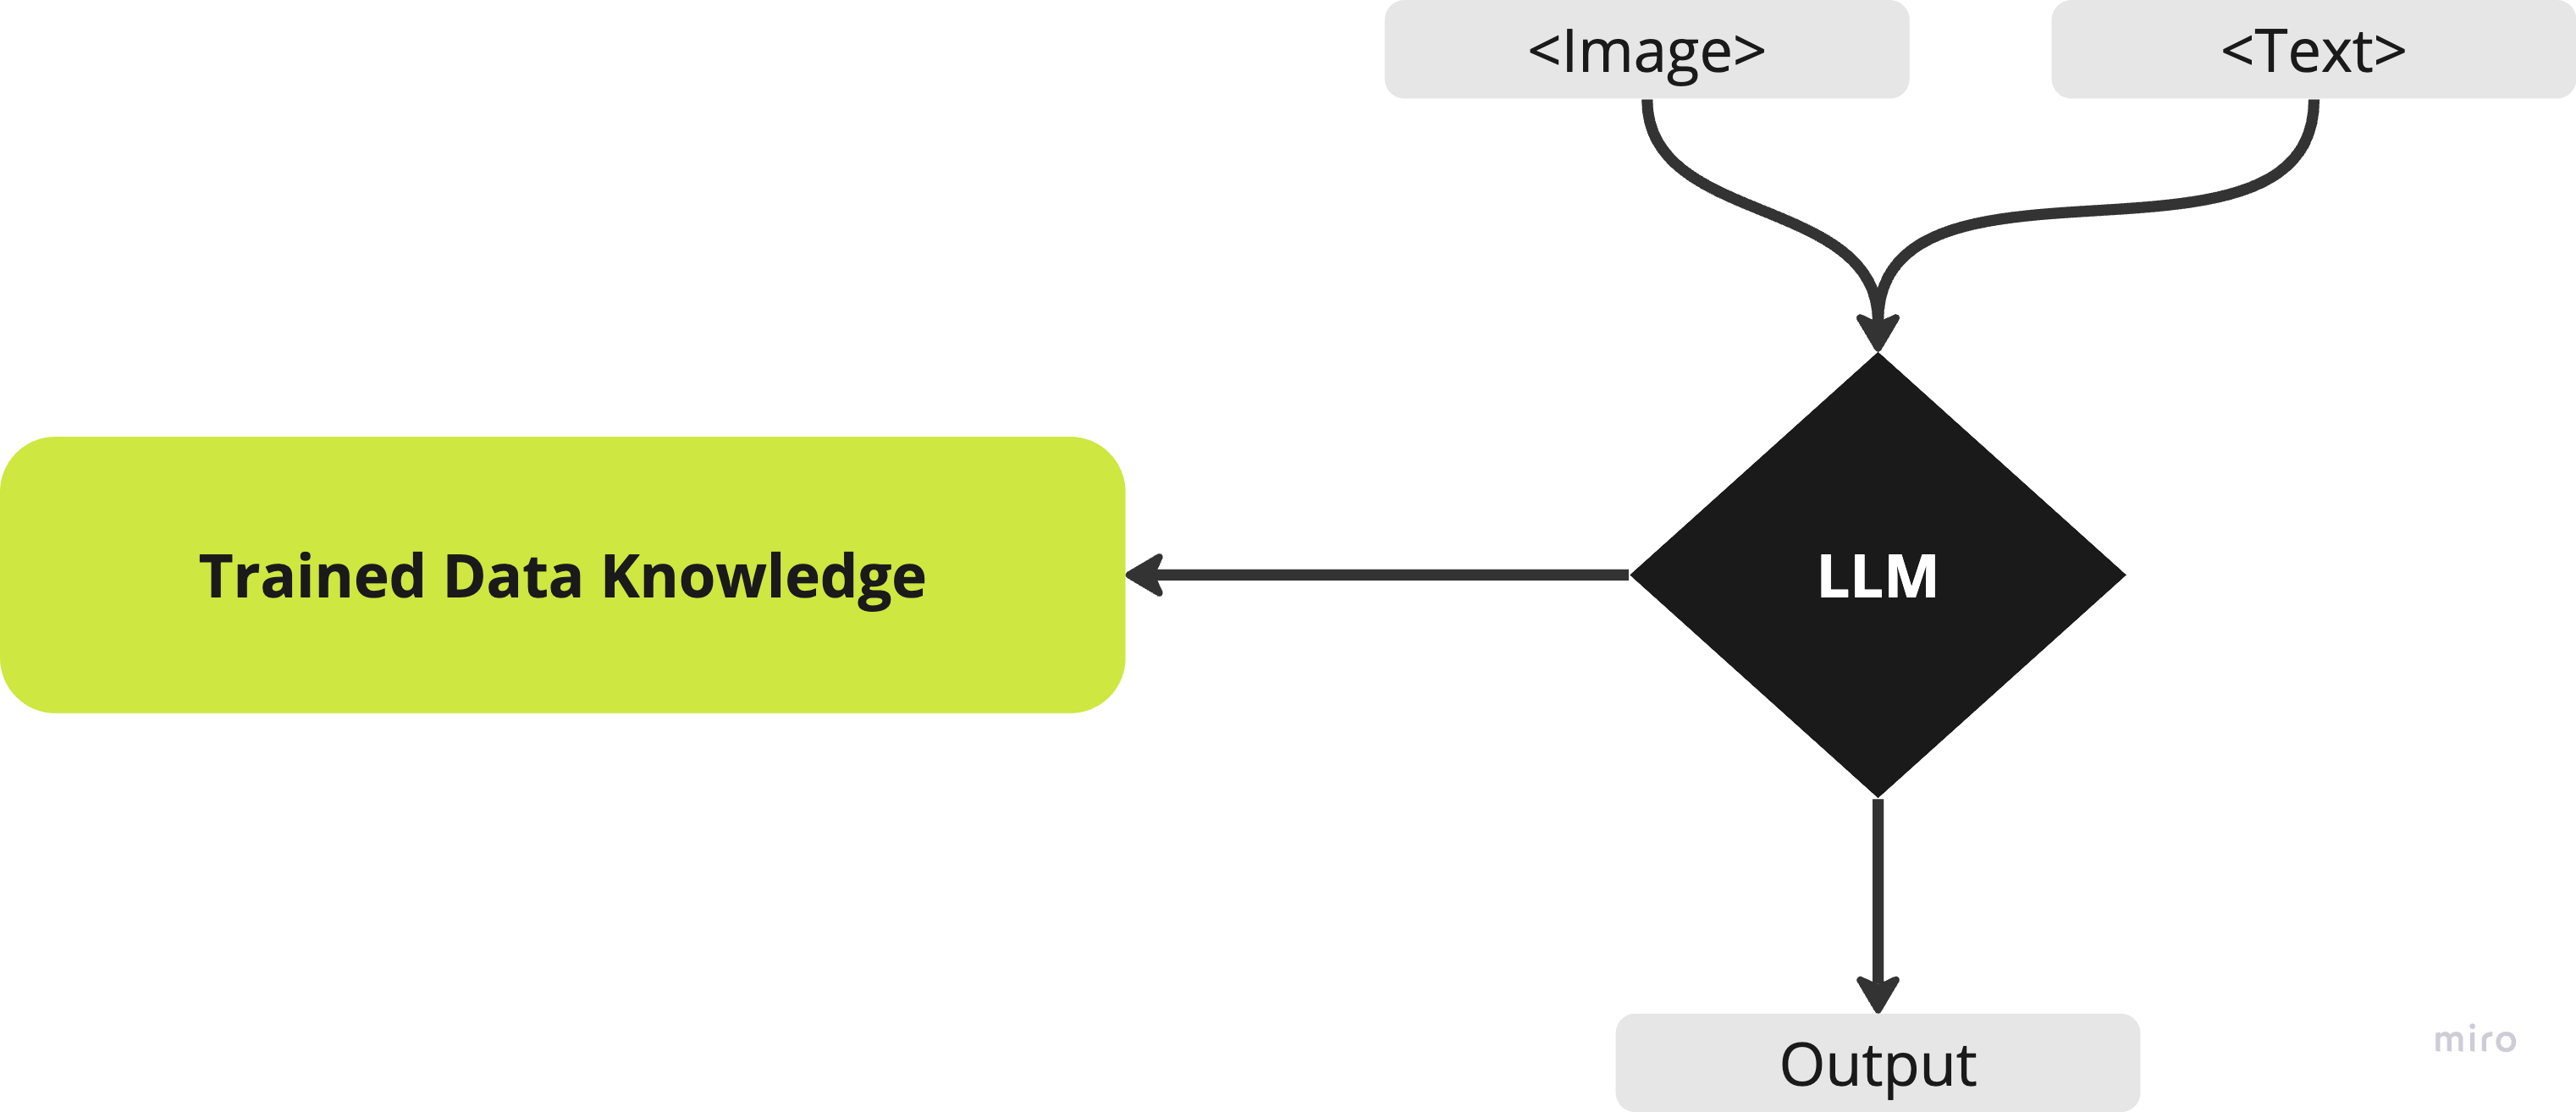

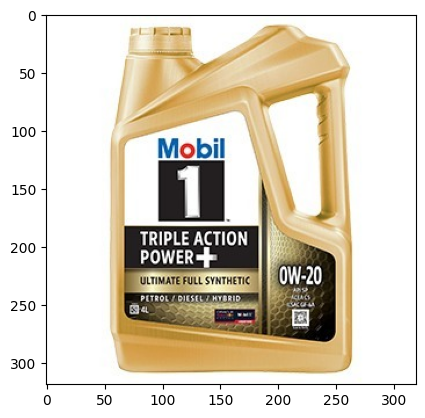

 The product name is Mobil 1 Triple Action Power+. The color of the bottle is gold. The text on the bottle is "Mobil 1", "Triple Action Power+", "Ultimate Full Synthetic", "0W-20", "API SN", "ILSAC GF-6A", "4L". The logo on the bottle is Mobil 1.


In [ ]:
# Fetching the image
image_url = "https://www.mobil.co.th/-/media/project/wep/mobil/mobil-th/product-banners/0w-20/0w-20_square-md-319x319.jpeg"
image = get_image(image_url, "exxon-01", "jpeg")

# Display the image (optional)
plt.imshow(image)
plt.show()

# Prompt for image analysis
prompt_ocr = """
Extract all the details from the image, including product name, color, and any visible text or logos.
"""

# Initialize the Gemini Pro Vision model using LangChain
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt_ocr,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},  # Using image URL directly
    ]
)

# Get the analysis from Gemini Pro Vision
result = llm.invoke([message])

# Print the analysis results
print(result.content)

#### Setting up Knowledge base

In [ ]:
import os
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from langchain.vectorstores import FAISS
from langchain.text_splitter import CharacterTextSplitter
from langchain.schema import Document

# Set up Azure Form Recognizer
endpoint = 'https://exxontugoatdi.cognitiveservices.azure.com/'
api_key = '40ed1c5af99c4439a6e5cee00729d205'
document_analysis_client = DocumentAnalysisClient(endpoint, AzureKeyCredential(api_key))

# Directory containing PDF files
pdf_directory = "/content/drive/MyDrive/src/"

# Function to read and extract text from a PDF file
def read_pdf(file_path):
    with open(file_path, "rb") as f:
        poller = document_analysis_client.begin_analyze_document("prebuilt-read", document=f)
        result = poller.result()

    pdf_text = ""
    for page in result.pages:
        for line in page.lines:
            pdf_text += line.content + "\n"
    return pdf_text

# List to store all extracted texts
all_texts = []

# Read all PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)
        extracted_text = read_pdf(pdf_path)

        # Display the extracted text for verification
        print(f"Extracted text from {filename}:\n{extracted_text}\n")

        # Add the extracted text to the list
        all_texts.append(extracted_text)

# Step 3: Create text chunks for each document using langchain
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
docs = [chunk for text in all_texts for chunk in text_splitter.split_documents([Document(page_content=text)])]

# Step 4: Embedding and Vectorstore
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()

Streaming output truncated to the last 5000 lines.
‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡∏ï‡∏±‡∏ß‡∏Å‡∏±‡∏ö‡∏ô‡πâ‡∏≥‡∏ó‡∏µ‡πà‡∏¢‡∏≠‡∏î‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°
‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡∏ï‡∏±‡∏ß‡∏à‡∏≤‡∏Å‡∏ô‡πâ‡∏≥‡πÅ‡∏•‡∏∞‡∏™‡∏¥‡πà‡∏á‡∏õ‡∏ô‡πÄ‡∏õ‡∏∑‡πâ‡∏≠‡∏ô‡∏ï‡∏•‡∏≠‡∏î‡∏≠‡∏≤‡∏¢‡∏∏‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡∏Ç‡∏≠‡∏á‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏ó‡∏µ‡πà‡∏£‡∏≤‡∏ö‡∏£‡∏∑‡πà‡∏ô‡πÅ‡∏•‡∏∞‡∏•‡∏î‡πÄ‡∏ß‡∏•‡∏≤‡∏ó‡∏µ‡πà‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏±‡∏Å‡∏£‡∏´‡∏¢‡∏∏‡∏î‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ã‡πà‡∏≠‡∏°‡πÅ‡∏ã‡∏°
‡∏¢‡∏∑‡∏î‡∏£‡∏∞‡∏¢‡∏∞‡πÄ‡∏ß‡∏•‡∏≤‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ñ‡πà‡∏≤‡∏¢‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡πÅ‡∏•‡∏∞‡∏•‡∏î‡∏Ñ‡πà‡∏≤‡πÉ‡∏ä‡πâ‡∏à‡πà‡∏≤‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô
‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ï‡πâ‡∏≤‡∏ô‡∏ó‡∏≤‡∏ô‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÄ‡∏™‡∏∑‡πà‡∏≠‡∏°‡∏™‡∏†‡∏≤‡∏û‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏≠‡∏≠‡∏Å‡∏ã‡∏¥‡πÄ‡∏î‡∏ä‡∏±‡πà‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ ‡∏£‡∏∞‡∏ö‡∏ö‡πÅ‡∏•‡∏∞‡∏ï‡∏±‡∏ß‡∏Å‡∏£‡∏≠‡∏á‡∏ó‡∏µ‡πà

In [ ]:
retriever.invoke("slides")

[Document(page_content="1. ‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡∏´‡∏•‡πà‡∏≠‡∏•‡∏∑‡πà‡∏ô‡πÅ‡∏•‡∏∞‡∏ú‡∏•‡∏¥‡∏ï‡∏†‡∏±‡∏ì‡∏ë‡πå‡∏´‡∏•‡πà‡∏≠‡∏•‡∏∑‡πà‡∏ô‡∏à‡∏≤‡∏Å MobiI'M | ‡πÄ‡∏ß‡πá‡∏ö‡πÑ‡∏ã‡∏ï‡πå‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏Ç‡∏≠‡∏á MobilIM‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡πÑ‡∏ó‡∏¢\n2. ‡∏ú‡∏•‡∏¥‡∏ï‡∏†‡∏±‡∏ì‡∏ë‡πå‡∏à‡∏≤‡∏Å Mobil'M\n3. Mobilith SHC Series\n‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏Ç‡∏≠‡∏á‡πÄ‡∏ß‡πá‡∏ö‡πÑ‡∏ã‡∏ï‡πå‡∏≠‡∏≤‡∏à‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏à‡∏±‡∏î‡πÑ‡∏ß‡πâ‡πÉ‡∏´‡πâ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏Ñ‡∏∏‡πâ‡∏Å‡∏Å‡∏µ‡πâ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì ‡∏Ñ‡∏•‡∏¥‡∏Å‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πà‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏≠‡∏±‡∏û‡πÄ‡∏î‡∏ï‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏±‡∏ö‡∏ï‡∏±‡πâ‡∏á\nMobilith SHC Series\n‡∏à‡∏≤‡∏£‡∏∞‡∏ö‡∏µ\n‡∏à‡∏≤‡∏£‡∏∞‡∏ö‡∏µ Mobilith SHCTM Series ‡πÄ‡∏õ‡πá‡∏ô‡∏ú‡∏•‡∏¥‡∏ï‡∏†‡∏±‡∏ì‡∏ë‡πå‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏™‡∏π‡∏á‡∏ó‡∏µ‡πà‡∏≠‡∏≠‡∏Å‡πÅ‡∏ö‡∏ö‡∏°‡∏≤‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡∏´‡∏•‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÉ‡∏ô‡∏™‡∏†‡∏≤‡∏û‡πÅ‡∏ß‡∏î‡∏

#### Text RAG

In [91]:
llm_text = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
template = """
```
{context}
```

{information}

You are ExxonMobil Employ try to sell product
Provide ExxonMobilThailand information and store location.
‡∏ñ‡πâ‡∏≤‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏ñ‡∏≤‡∏°‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏£‡∏ñ‡∏ï‡∏±‡∏ß‡πÄ‡∏≠‡∏á‡πÉ‡∏´‡πâ‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥ 3 product ‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Å‡∏±‡∏ô
‡πÉ‡∏ä‡πâ emoji ‡∏ö‡∏≤‡∏á‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÉ‡∏´‡πâ‡∏î‡∏π‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏±‡∏ô‡πÄ‡∏≠‡∏á
‡∏≠‡∏ò‡∏¥‡∏ö‡∏≤‡∏¢‡πÉ‡∏´‡πâ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏á‡πà‡∏≤‡∏¢‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏´‡πá‡∏ô‡∏†‡∏≤‡∏û
"""
prompt = ChatPromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever, "information": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

#### RAG with Text and Image

In [ ]:
llm_vision = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.0)
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

### Result

In [94]:
result = rag_chain.invoke("‡∏Ç‡∏≠‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡πÅ‡∏•‡∏∞‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ç‡∏≠‡∏áMobil Delvac Super 20W-50")
display(Markdown(result))

‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ‡∏Ñ‡∏£‡∏±‡∏ö üôè  ‡∏™‡∏ô‡πÉ‡∏à **Mobil Delvac Super 20W-50**  ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ä‡πà‡πÑ‡∏´‡∏°‡∏Ñ‡∏£‡∏±‡∏ö üëç ‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏µ‡πâ‡∏Ç‡∏∂‡πâ‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏≠‡∏∂‡∏î ‡∏ñ‡∏∂‡∏Å ‡∏ó‡∏ô‡∏ó‡∏≤‡∏ô ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏£‡∏ñ‡∏ö‡∏£‡∏£‡∏ó‡∏∏‡∏Å‡∏´‡∏ô‡∏±‡∏Å ‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏¢‡∏ô‡∏ï‡πå‡∏î‡∏µ‡πÄ‡∏ã‡∏• ‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏´‡∏ô‡∏±‡∏Å‡πÜ ‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î üí™

**‡∏Ñ‡∏∏‡∏ì‡∏™‡∏°‡∏ö‡∏±‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á Mobil Delvac Super 20W-50 ‡∏ó‡∏µ‡πà‡πÇ‡∏î‡∏î‡πÄ‡∏î‡πà‡∏ô üí™**

* **‡πÄ‡∏Å‡∏£‡∏î:** SAE 20W-50 üå°Ô∏è (‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏≠‡∏≤‡∏Å‡∏≤‡∏®‡∏£‡πâ‡∏≠‡∏ô‡πÜ ‡πÉ‡∏ô‡∏ö‡πâ‡∏≤‡∏ô‡πÄ‡∏£‡∏≤)
* **‡πÄ‡∏ñ‡πâ‡∏≤‡∏ã‡∏±‡∏•‡πÄ‡∏ü‡∏ï:** 0.8%  (‡∏ä‡πà‡∏ß‡∏¢‡∏•‡∏î‡∏Å‡∏≤‡∏£‡∏™‡∏∂‡∏Å‡∏´‡∏£‡∏≠‡∏Ç‡∏≠‡∏á‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏¢‡∏ô‡∏ï‡πå‡πÑ‡∏î‡πâ‡∏î‡∏µ)
* **‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏ô‡∏≤‡πÅ‡∏ô‡πà‡∏ô:** 0.88 g/cm3  (‡∏Å‡∏≤‡∏£‡πÑ‡∏´‡∏•‡πÄ‡∏ß‡∏µ‡∏¢‡∏ô‡∏Ç‡∏≠‡∏á‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏î‡∏µ‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°)
* **‡∏à‡∏∏‡∏î‡∏ß‡∏≤‡∏ö‡πÑ‡∏ü:** 244 ¬∞C üî• (‡∏ó‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡πâ‡∏≠‡∏ô‡∏™‡∏π‡∏á ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏Å‡∏≤‡∏£‡∏£‡∏∞‡πÄ‡∏´‡∏¢) 
* **‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏ô‡∏∑‡∏î:**  17.6 mm2/s @ 100¬∞C (‡∏´‡∏•‡πà‡∏≠‡∏•‡∏∑‡πà‡∏ô‡πÑ‡∏î‡πâ‡∏î‡∏µ‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡∏™‡∏†‡∏≤‡∏ß‡∏∞)
* **‡∏à‡∏∏‡∏î‡πÑ‡∏´‡∏•‡πÄ‡∏ó:** -30 ¬∞C ‚ùÑÔ∏è (‡∏™‡∏ï‡∏≤‡∏£‡πå‡∏ó‡∏ï‡∏¥‡∏î‡∏á‡πà‡∏≤‡∏¢‡πÉ‡∏ô‡∏≠‡∏∏‡∏ì‡∏´‡∏†‡∏π‡∏°‡∏¥‡∏ï‡πà‡∏≥)

**‡∏™‡∏£‡∏∏‡∏õ‡∏á‡πà‡∏≤‡∏¢‡πÜ ‡∏Ñ‡∏∑‡∏≠ Mobil Delvac Super 20W-50 ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ...**

* ‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏¢‡∏ô‡∏ï‡πå‡∏™‡∏∞‡∏≠‡∏≤‡∏î üßπ
* ‡∏¢‡∏∑‡∏î‡∏≠‡∏≤‡∏¢‡∏∏‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏¢‡∏ô‡∏ï‡πå ‚è≥
* ‡∏õ‡∏£‡∏∞‡∏´‡∏¢‡∏±‡∏î‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡πÄ‡∏ä‡∏∑‡πâ‡∏≠‡πÄ‡∏û‡∏•‡∏¥‡∏á ‚õΩ
* ‡∏•‡∏î‡∏Ñ‡πà‡∏≤‡∏ö‡∏≥‡∏£‡∏∏‡∏á‡∏£‡∏±‡∏Å‡∏©‡∏≤ üí∞

**‡πÅ‡∏ï‡πà...** ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à‡∏ß‡πà‡∏≤‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡∏ï‡∏±‡∏ß‡∏ô‡∏µ‡πâ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏£‡∏ñ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏à‡∏£‡∏¥‡∏á‡πÜ ‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ç‡∏≠‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏£‡∏ñ‡∏´‡∏ô‡πà‡∏≠‡∏¢‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°‡∏Ñ‡∏£‡∏±‡∏ö?  üßê  ‡πÄ‡∏ä‡πà‡∏ô ‡∏¢‡∏µ‡πà‡∏´‡πâ‡∏≠ ‡∏£‡∏∏‡πà‡∏ô ‡∏õ‡∏µ  

**‡∏û‡∏¥‡πÄ‡∏®‡∏©!**  ‡∏ú‡∏°‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏≠‡∏µ‡∏Å 3 ‡∏ï‡∏±‡∏ß‡∏ó‡∏µ‡πà‡∏≠‡∏¢‡∏≤‡∏Å‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥  ü§©

1. **Mobil Delvac 1 ESP 5W-40:**  ‡∏ï‡∏±‡∏ß‡∏ó‡πá‡∏≠‡∏õ!  ‡∏õ‡∏£‡∏∞‡∏´‡∏¢‡∏±‡∏î‡∏ô‡πâ‡∏≥‡∏°‡∏±‡∏ô ‡∏õ‡∏Å‡∏õ‡πâ‡∏≠‡∏á‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏¢‡∏ô‡∏ï‡πå‡∏Ç‡∏±‡πâ‡∏ô‡∏™‡∏∏‡∏î  ‚ú®
2. **Mobil Delvac MX 15W-40:**   ‡∏Ñ‡∏∏‡πâ‡∏°‡∏Ñ‡πà‡∏≤ ‡∏Ñ‡∏∏‡πâ‡∏°‡∏£‡∏≤‡∏Ñ‡∏≤  ‡∏õ‡∏Å‡∏õ‡πâ‡∏≠‡∏á‡∏î‡∏µ‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°‡πÉ‡∏ô‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏£‡∏∞‡∏´‡∏¢‡∏±‡∏î üòâ
3. **Mobil 1 FS 0W-40:**   ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏ñ‡πÄ‡∏ö‡∏ô‡∏ã‡∏¥‡∏ô  ‡πÅ‡∏£‡∏á ‡πÄ‡∏£‡πá‡∏ß ‡∏õ‡∏Å‡∏õ‡πâ‡∏≠‡∏á‡πÄ‡∏ï‡πá‡∏°‡∏û‡∏•‡∏±‡∏á  üöÄ

‡∏•‡∏≠‡∏á‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏î‡∏π‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö  üòä  ‡∏´‡∏£‡∏∑‡∏≠‡∏ñ‡πâ‡∏≤‡∏≠‡∏¢‡∏≤‡∏Å‡πÑ‡∏î‡πâ‡∏Ñ‡∏≥‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°  ‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡∏ú‡∏°‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö ‡∏¢‡∏¥‡∏ô‡∏î‡∏µ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏Ñ‡∏£‡∏±‡∏ö üòÑ

**ExxonMobil Thailand** 
**Website:**  [‡πÉ‡∏™‡πà website ExxonMobil Thailand]
**Facebook:**  [‡πÉ‡∏™‡πà Facebook ExxonMobil Thailand]
**Line Official:**  [‡πÉ‡∏™‡πà Line Official ExxonMobil Thailand]

**‡∏™‡∏≤‡∏Ç‡∏≤‡πÉ‡∏Å‡∏•‡πâ‡∏ö‡πâ‡∏≤‡∏ô‡∏ó‡πà‡∏≤‡∏ô:**  (‡∏£‡∏ö‡∏Å‡∏ß‡∏ô‡∏Ç‡∏≠‡∏ó‡∏£‡∏≤‡∏ö‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î‡∏ó‡∏µ‡πà‡∏ó‡πà‡∏≤‡∏ô‡∏≠‡∏¢‡∏π‡πà‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö üôè) 

**‡∏¢‡∏¥‡∏ô‡∏î‡∏µ‡πÉ‡∏´‡πâ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡∏Ñ‡∏£‡∏±‡∏ö** üòÑ
